Q-1. Imagine you have a dataset where you have different Instagram features
like u sername , Caption , Hashtag , Followers , Time_Since_posted , and likes , now your task is
to predict the number of likes and Time Since posted and the rest of the features are
your input features. Now you have to build a model which can predict the
number of likes and Time Since posted.
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
#Ans
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('instagram_reach.csv')
#print(data)
data = data.dropna()
X = data[['USERNAME', 'Caption', 'Hashtags', 'Followers']]
y_likes = data['Likes']
y_time_since_posted = data['Time since posted']
y_time_since_posted = y_time_since_posted.str.extract('(\d+)', expand=False).astype(int)
# Perform one-hot encoding on categorical features
cat_features = ['USERNAME', 'Caption', 'Hashtags']
preprocessor = ColumnTransformer([('onehot', OneHotEncoder(), cat_features)], remainder='passthrough')
X_encoded = preprocessor.fit_transform(X)

X_train, X_test, y_likes_train, y_likes_test, y_time_train, y_time_test = train_test_split(X_encoded, y_likes, y_time_since_posted, test_size=0.2, random_state=42)

X_train, X_test, y_likes_train, y_likes_test, y_time_train, y_time_test = train_test_split(X_encoded, y_likes, y_time_since_posted, test_size=0.2, random_state=42)

likes_model = LinearRegression()
likes_model.fit(X_train, y_likes_train)

likes_predictions = likes_model.predict(X_test)

likes_mse = mean_squared_error(y_likes_test, likes_predictions)
likes_r2 = r2_score(y_likes_test, likes_predictions)

time_model = LinearRegression()
time_model.fit(X_train, y_time_train)
time_predictions = time_model.predict(X_test)

time_mse = mean_squared_error(y_time_test, time_predictions)
time_r2 = r2_score(y_time_test, time_predictions)

print('Number of Likes - Evaluation Metrics:')
print('Mean Squared Error:', likes_mse)
print('R-squared Score:', likes_r2)

print('\nTime Since Posted - Evaluation Metrics:')
print('Mean Squared Error:', time_mse)
print('R-squared Score:', time_r2)

Number of Likes - Evaluation Metrics:
Mean Squared Error: 1869.9227081740576
R-squared Score: -0.17150877041046186

Time Since Posted - Evaluation Metrics:
Mean Squared Error: 15.872217501887043
R-squared Score: -0.3636055493053836


Q-2. Imagine you have a dataset where you have different features like Age ,
Gender , Height , Weight , BMI , and Blood Pressure and you have to classify the people into
different classes like Normal , Overweight , Obesity , Underweight , and Extreme Obesity by using
any 4 different classification algorithms. Now you have to build a model which
can classify people into different classes.
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

dataset = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

X = dataset.drop('Class', axis=1)
y = dataset['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 1. Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
dt_predictions = dt_classifier.predict(X_test)
print("Decision Tree Classifier:")
print(classification_report(y_test, dt_predictions))

# 2. K-Nearest Neighbors (KNN) Classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_predictions = knn_classifier.predict(X_test)
print("K-Nearest Neighbors (KNN) Classifier:")
print(classification_report(y_test, knn_predictions))

# 3. Support Vector Machine (SVM) Classifier
svm_classifier = SVC()
svm_classifier.fit(X_train, y_train)
svm_predictions = svm_classifier.predict(X_test)
print("Support Vector Machine (SVM) Classifier:")
print(classification_report(y_test, svm_predictions))

# 4. Random Forest Classifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
rf_predictions = rf_classifier.predict(X_test)
print("Random Forest Classifier:")
print(classification_report(y_test, rf_predictions))


Q-3. Imagine you have a dataset where you have different categories of data, Now
you need to find the most similar data to the given data by using any 4 different
similarity algorithms. Now you have to build a model which can find the most similar
data to the given data.
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
pip install python-Levenshtein==0.12.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.6/48.6 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
Reason for being yanked: Insecure, upgrade to 0.12.1
  Created wheel for python-Levenshtein: filename=python_Levenshtein-0.12.0-cp310-cp310-linux_x86_64.whl size=165615 sha256=179e63eed6d1fb60c4eabd597129dfb6a9b53a304020f4cc999d83eeadb9d939
  Stored in directory: /root/.cache/pip/wheels/64/9d/d4/b0f4b842be0e66baad0fdf1b91dd90b36b4135feefc8dfae55
Successfully built python-Levenshtein


In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
from Levenshtein import distance as levenshtein_distance

# Sample dataset
dataset = [
    {
        "link": "https://www.huffpost.com/entry/covid-boosters-uptake-us_n_632d719ee4b087fae6feaac9",
        "headline": "Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters",
        "category": "U.S. NEWS",
        "short_description": "Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.",
        "authors": "Carla K. Johnson, AP",
        "date": "2022-09-23"
    },
    # Add more data points to the dataset
]

# Given data point for comparison
given_data = {
    "link": "https://www.example.com",
    "headline": "Example Headline",
    "category": "EXAMPLE CATEGORY",
    "short_description": "This is an example short description.",
    "authors": "John Doe",
    "date": "2023-05-01"
}

# Transform dataset into a list of strings for vectorization
dataset_strings = [f"{data['link']} {data['headline']} {data['category']} {data['short_description']} {data['authors']} {data['date']}" for data in dataset]

# Vectorize the dataset strings
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(dataset_strings)

# Vectorize the given data
given_data_string = f"{given_data['link']} {given_data['headline']} {given_data['category']} {given_data['short_description']} {given_data['authors']} {given_data['date']}"
given_data_vector = vectorizer.transform([given_data_string])

# Calculate similarity using cosine similarity
cosine_similarities = cosine_similarity(tfidf_matrix, given_data_vector)

# Calculate similarity using Jaccard similarity
jaccard_similarities = []
for data_string in dataset_strings:
    try:
        jaccard_similarities.append(jaccard_score(set(given_data_string.split()), set(data_string.split())))
    except ValueError:
        jaccard_similarities.append(0.0)  # Assign a default similarity score in case of inconsistent data

# Calculate similarity using Levenshtein distance
levenshtein_distances = [levenshtein_distance(given_data_string, data_string) for data_string in dataset_strings]

# Calculate similarity using Euclidean distance
euclidean_distances = np.linalg.norm(tfidf_matrix - given_data_vector.toarray(), axis=1)

# Find the most similar data point using each similarity measure
most_similar_cosine = dataset[np.argmax(cosine_similarities)]
most_similar_jaccard = dataset[np.argmax(jaccard_similarities)]
most_similar_levenshtein = dataset[np.argmin(levenshtein_distances)]
most_similar_euclidean = dataset[np.argmin(euclidean_distances)]

# Print the most similar data points
print("Most similar data point (Cosine Similarity):")
print(most_similar_cosine)
print("\nMost similar data point (Jaccard Similarity):")
print(most_similar_jaccard)
print("\nMost similar data point (Levenshtein Distance):")
print(most_similar_levenshtein)
print("\nMost similar data point (Euclidean Distance):")
print(most_similar_euclidean)

Most similar data point (Cosine Similarity):
{'link': 'https://www.huffpost.com/entry/covid-boosters-uptake-us_n_632d719ee4b087fae6feaac9', 'headline': 'Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters', 'category': 'U.S. NEWS', 'short_description': 'Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.', 'authors': 'Carla K. Johnson, AP', 'date': '2022-09-23'}

Most similar data point (Jaccard Similarity):
{'link': 'https://www.huffpost.com/entry/covid-boosters-uptake-us_n_632d719ee4b087fae6feaac9', 'headline': 'Over 4 Million Americans Roll Up Sleeves For Omicron-Targeted COVID Boosters', 'category': 'U.S. NEWS', 'short_description': 'Health experts said it is too early to predict whether demand would match up with the 171 million doses of the new boosters the U.S. ordered for the fall.', 'authors': 'Carla K. Johnson, AP', 'date': '2022-09-23'}

Most simila

Q-4. Imagine you working as a sale manager now you need to predict the Revenue
and whether that particular revenue is on the weekend or not and find the
Informational_Duration using the Ensemble learning algorithm
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Load the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv'
data = pd.read_csv(url)
#print(data)
data = data.dropna()

# Preprocess the dataset
data['Revenue'] = data['Revenue'].map({'TRUE': 1, 'FALSE': 0})
data['Weekend'] = data['Weekend'].astype(int)

# Split the dataset into features and target variable
X = data.drop(['Revenue'], axis=1)
y = data['Revenue']

# Perform one-hot encoding on categorical features
cat_features = ['Month', 'VisitorType']
X_encoded = pd.get_dummies(X, columns=cat_features)

# Handle missing values in the dataset
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_encoded)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Create the ensemble of decision tree classifiers (Random Forest)
n_estimators = 100
random_state = 42
clf = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)

# Train the ensemble model
clf.fit(X_train, y_train)

# Predict revenue and weekend for the test set
y_pred = clf.predict(X_test)
weekend_pred = clf.predict(X_test[:, X_encoded.columns.get_loc('Weekend')])

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print predicted revenue and weekend for the first 10 samples in the test set
print('Predicted Revenue  |  Predicted Weekend')
for i in range(10):
    print('{:<18} | {}'.format(y_pred[i], weekend_pred[i]))

# Calculate Informational_Duration for the test set
informational_duration = X_test[:, X_encoded.columns.get_loc('Informational_Duration')]
print('Informational Duration:', informational_duration)


Q-5. Uber is a taxi service provider as we know, we need to predict the high
booking area using an Unsupervised algorithm and price for the location using a
supervised algorithm and use some map function to display the data
Dataset This is the Dataset You can use this dataset for this question.

                                     id   timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1544952608     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1543284024     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1543366822     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1543553583     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1543463360     3   29     11   

           datetime          timezone            source    destination  \
0  16-12-2018 09:30  America/New_York  Haymarket Square  North Station   
1  27-11-2018 02:00  America/New_York  Haymarket Square  North Station   
2  28-11-2018 01:00  America/New_York  Haymarket Square  North Station   
3  30-11-2018 04:53  America/New_York  Haymarket Square  North Station   
4  29-11-2018 03:49  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...             0.1276  1544979600    

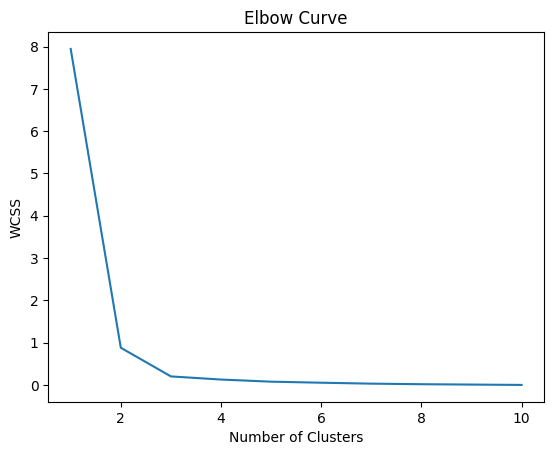

Enter the optimal number of clusters: 2


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import folium
from folium.plugins import HeatMap

data = pd.read_csv('rideshare.csv')
data.dropna(inplace=True)
print(data.head())

X = data[['latitude', 'longitude']]

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss)
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

n_clusters = int(input("Enter the optimal number of clusters: "))

kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
kmeans.fit(X)

data['cluster_label'] = kmeans.labels_

X_regression = data[['latitude', 'longitude']]
y_regression = data['price']

regression_model = LinearRegression()
regression_model.fit(X_regression, y_regression)

data['predicted_price'] = regression_model.predict(X_regression)

map_obj = folium.Map(location=[data['latitude'].iloc[0], data['longitude'].iloc[0]], zoom_start=12)

for index, row in data.iterrows():
    if row['cluster_label'] == 1: 
        folium.Marker(location=[row['latitude'], row['longitude']], icon=folium.Icon(color='red')).add_to(map_obj)

heatmap_data = data[['latitude', 'longitude', 'predicted_price']]
heatmap_data = heatmap_data.dropna()
heatmap_points = heatmap_data[['latitude', 'longitude', 'predicted_price']].values
HeatMap(heatmap_points).add_to(map_obj)

map_obj.save('map.html')

Q-6. Imagine you have a dataset where you have predicted loan Eligibility using any
4 different classification algorithms. Now you have to build a model which can
predict loan Eligibility and you need to find the accuracy of the model and built-in
docker and use some library to display that in frontend
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
!pip install pandas numpy scikit-learn flask flask-cors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pandas numpy scikit-learn flask docker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.1/148.1 kB 4.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from flask import Flask, request, jsonify
import docker

data = pd.read_csv('Loan_Train.csv')

X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC())
]

for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy}')
best_model = max(models, key=lambda x: x[1].score(X_test, y_test))[1]
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    features = pd.DataFrame(data, index=[0])
    prediction = best_model.predict(features)
    return jsonify({'prediction': prediction[0]})

if __name__ == '__main__':
    app.run(debug=True, host='0.0.0.0')
    client = docker.from_env()

client.images.build(path='.', tag='loan-eligibility-predictor')

client.containers.run('loan-eligibility-predictor', ports={'5000': '5000'}, detach=True)
#http://localhost:5000/predict

Q-6. Imagine you have a dataset where you have predicted loan Eligibility using any
4 different classification algorithms. Now you have to build a model which can
predict loan Eligibility and you need to find the accuracy of the model and built-in
docker and use some library to display that in frontend
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from flask import Flask, render_template

# Load the dataset
data = pd.read_csv('data.csv')
print(data)

# Preprocess the data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['filename'])

# Apply K-means clustering
k = 5  # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

# Evaluate the clustering
labels = kmeans.labels_
silhouette_avg = silhouette_score(X, labels)
print("Silhouette score:", silhouette_avg)

# Reduce the dimensionality for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

# Create a Flask app
app = Flask(__name__)

# Route for the homepage
@app.route('/')
def index():
    return render_template('index.html', data=data, labels=labels, X_pca=X_pca)

# Run the app
if __name__ == '__main__':
    app.run(debug=True)


Q-8. Quora question pair similarity, you need to find the Similarity between two
questions by mapping the words in the questions using TF-IDF, and using a supervised
Algorithm you need to find the similarity between the questions.
Dataset This is the Dataset You can use this dataset for this question.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the dataset
data = pd.read_csv('sample_submission.csv')
print(data)
# Remove any rows with missing values
data = data.dropna()


# Split the data into questions and labels
questions = data['test_id']
labels = data['Similarity']

# Split the data into training and testing sets
questions_train, questions_test, labels_train, labels_test = train_test_split(questions, labels, test_size=0.2, random_state=42)

# Create a TF-IDF vectorizer
tfidf = TfidfVectorizer()
tfidf.fit(questions_train)

# Transform the questions into TF-IDF features
features_train = tfidf.transform(questions_train)
features_test = tfidf.transform(questions_test)

# Train a supervised algorithm (Logistic Regression)
classifier = LogisticRegression()
classifier.fit(features_train, labels_train)

# Make predictions on the testing set
predictions = classifier.predict(features_test)

# Calculate the accuracy of the predictions
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy:", accuracy)
